## Лабораторная работа №2 по прикладной математике

### Выполнили: Ребрик Артем, Кудряшов Егор, Васильева Екатерина

### Группа: М32081

****1. Градиентный спуск с постоянным шагом****

In [2]:
import numpy as np
import matplotlib.pyplot as plt

##### Теория:

Градиентный спуск - это метод оптимизации, который используется для нахождения локального минимума (или максимума) функции, определяемой градиентом (производной) функции. Градиент определяет направление наискорейшего роста функции, поэтому на каждой итерации мы будем двигаться в направлении, противоположном градиенту.

Градиентный спуск с постоянным шагом - это метод, в котором на каждой итерации мы двигаемся на фиксированную величину в направлении, противоположном градиенту. Такой метод может быть эффективен, если шаг выбран правильно, но может привести к проблемам сходимости, если шаг слишком большой или слишком маленький.

Метод градиента в чистом виде формирует шаг по переменным как функцию от градиента F(х) В текущей точке поиска. Простейший алгоритм поиска Min F(X) записывается в векторной форме следующим образом:
$x^{i+1}=x^i-h*grad f(x^i)$

##### Код:

In [3]:
def gradient_descent_constant_step(func, grad, x0, step_size, max_iter):
    points = np.array([x0])
    x = x0
    for _ in range(max_iter):
        grad_value = grad(x)
        x = x - step_size * grad_value

        for x_i in x:
            points = np.append(points, [x], axis=0)

    return x, func(x), points


****2. Спуск с дроблением шага****

##### Теория:

Алгоритм спуска с дроблением шага использует условие Армихо для выбора размера шага на каждой итерации. Условие Армихо гарантирует, что выбранный размер шага будет достаточно маленьким, чтобы градиентный спуск не "перепрыгивал" через локальный минимум, но достаточно большим, чтобы спуск был эффективным.

##### Код

In [4]:
def armijo_backtracking(func, grad, x0, alpha=0.1, beta=0.5, max_iter=1000, eps=1e-6):
    points = np.array([x0])
    x = x0
    for i in range(max_iter):
        grad_value = grad(x)
        t = alpha
        while func(x - t * grad_value) > func(x) - t * eps * np.linalg.norm(grad_value)**2:
            t *= beta
        x = x - t * grad_value
        points = np.append(points, [x], axis=0)
        if np.linalg.norm(grad_value) < eps:
            break
    return x, func(x), points


****3. Метод наискорешего спуска****

##### Теория:
Принцип метода в том, шаг расчета выбирается такой величины, что движение выполняется до тех пор, пока происходит улучшение функции, достигая, таким образом, экстремума в некоторой точке. В этой точке вновь определяют направление поиска (с помощью градиента) и ищут новую точку оптимума целевой функции и т.д. Таким образом, в данном методе поиск происходит более крупными шагами, и градиент функции вычисляется в меньшем числе точек. Поиск оптимального решения завершается в случае, когда на итерационном шаге расчета (несколько критериев):
- траектория поиска остается в малой окрестности текущей точки поиска
- приращение целевой функции не меняется
- градиент целевой функции в точке локального минимума обращается в нуль



##### Код:

In [5]:
def golden_section_search(func, a, b, eps):
    fi = ((np.sqrt(5) + 1) / 2)

    c = b + (a - b) / fi
    d = a + (b - a) / fi

    fc = func(c)
    fd = func(d)

    while b - a >= eps:
        if fc < fd:
            b = d
            d = c
            fd = fc
            c = b + (a - b) / fi
            fc = func(c)
        else:
            a = c
            c = d
            fc = fd
            d = a + (b - a) / fi
            fd = func(d)


    return (a + b) / 2


def steepest_descent(func, grad, x0, eps=1e-6, max_iter=1000):
    points = np.array([x0])
    x = x0
    for _ in range(max_iter):
        grad_value = grad(x)
        alpha = golden_section_search(lambda t: func(x - t * grad_value), 0, 1, eps)
        x = x - alpha * grad_value
        points = np.append(points, [x], axis=0)
        if np.linalg.norm(grad_value) < eps:
            break
    return x, func(x), points


****4. Метод сопряженных градиентов****

##### Теория:
Принцип метода в нахождении локального экстремума функции на основе информации о её значениях и её градиенте.
Основным достоинством метода является то, что он решает квадратичную задачу оптимизации за конечное число шагов. Поэтому, сначала описывается метод сопряжённых градиентов для оптимизации квадратичного функционала, выводятся итерационные формулы, приводятся оценки скорости сходимости. После этого показывается, как метод сопряжённых обобщается для оптимизации произвольного функционала, рассматриваются различные варианты метода и сходимость.

##### Код:

In [6]:
def fletcher_reeves(func, grad, x0, eps=1e-6, max_iter=1000):
    points = np.array([x0])
    x = x0
    grad_prev = grad(x0)
    d = -grad_prev

    for _ in range(max_iter):
        alpha = line_search(func, grad, x, d)
        x = x + alpha * d
        grad_current = grad(x)

        beta = np.dot(grad_current, grad_current) / np.dot(grad_prev, grad_prev)
        d = -grad_current + beta * d

        points = np.append(points, [x], axis=0)
        if np.linalg.norm(grad_current) < eps:
            break

        grad_prev = grad_current

    return x, func(x), points


def line_search(func, grad, x, d):
    alpha = 1.0
    c = 0.5
    rho = 0.5

    while func(x + alpha * d) > func(x) + c * alpha * np.dot(grad(x), d):
        alpha = rho * alpha

    return alpha


****5. Анализ траекторий предложенных алгоритмов на примере квадратичных функций****

******а)****** $f(x)= x^2 + 3 y^2 + 2xy$

In [7]:
def f1(x):
    return x[0]**2 + 3*x[1]**2 + 2*x[0]*x[1]

def grad_f1(x):
    grad_x = 2*x[0] + 2*x[1]
    grad_y = 6*x[1] + 2*x[0]
    return np.array([grad_x, grad_y])

In [8]:
# Set initial variable values and optimization parameters
x0 = np.array([10.0, 10.0])

##### Спуск с постоянным шагом #####

In [9]:
# Run the optimization method
x_opt, f_opt, _ = gradient_descent_constant_step(f1, grad_f1, x0, 0.001, 10000)

# Print the results
print("Optimal variable values:", ["{:.15f}".format(x) for x in x_opt])
print("Function value at the optimal point:", "{:.15f}".format(f_opt))

Optimal variable values: ['0.000040542525593', '-0.000016793263953']
Function value at the optimal point: 0.000000001128055


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


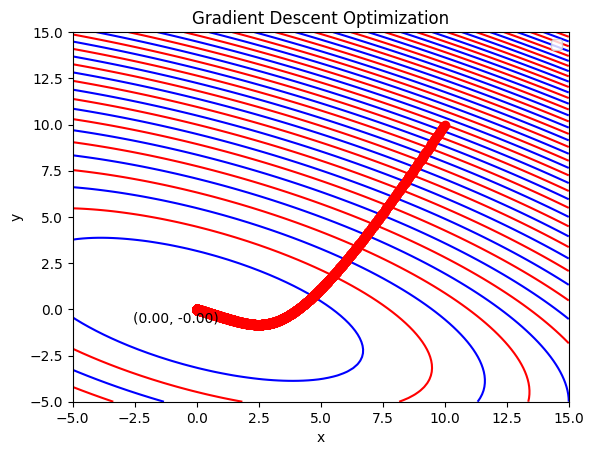

In [10]:
x_opt, f_opt, points = gradient_descent_constant_step(f1, grad_f1, x0, 0.001, 10000)

t = np.linspace(-5, 15, 100)
X, Y = np.meshgrid(t, t)
Z = f1 ([X, Y])

fig, ax = plt.subplots()
ax.contour(X, Y, Z, colors=['red', 'blue'], levels=50)
ax.plot(points[:, 0], points[:, 1], 'ro-')
ax.annotate(f'({x_opt[0]:.2f}, {x_opt[1]:.2f})', (x_opt[0], x_opt[1]), textcoords="offset points", xytext=(-15,-10), ha='center')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Gradient Descent Optimization')
ax.legend()

plt.show()


*****В результате работы метода для этих параметров получаем следующий график. На нем представлена траектория градиентного спуска и линии уровня
функции f(x, y)*****

##### Спуск с дроблением шага #####

In [11]:
x_opt, f_opt, _ = armijo_backtracking(f1, grad_f1, x0)

print("Optimal variable values:", ["{:.15f}".format(x) for x in x_opt])
print("Function value at the optimal point:", "{:.15f}".format(f_opt))

Optimal variable values: ['0.000000670121777', '-0.000000277573528']
Function value at the optimal point: 0.000000000000308


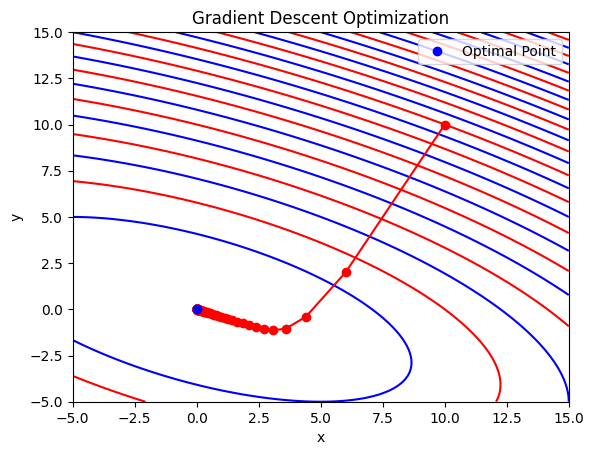

In [12]:
x_opt, f_opt, points = armijo_backtracking(f1, grad_f1, x0)

t = np.linspace(-5, 15, 100)
X, Y = np.meshgrid(t, t)
Z = f1([X, Y])

fig, ax = plt.subplots()
ax.contour(X, Y, Z, colors=['red', 'blue'], levels=30)
ax.plot(points[:, 0], points[:, 1], 'ro-')
ax.plot(x_opt[0], x_opt[1], 'bo', label='Optimal Point')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Gradient Descent Optimization')
ax.legend()

plt.show()

##### Метод наискорейшего спуска #####

In [13]:
eps = 1e-6
max_iter = 10000

x_opt, f_opt, _ = steepest_descent(f1, grad_f1, x0, eps, max_iter)

print("Optimal variable values:", ["{:.15f}".format(x) for x in x_opt])
print("Function value at the optimal point:", "{:.15f}".format(f_opt))


Optimal variable values: ['0.000000028924620', '0.000000028932141']
Function value at the optimal point: 0.000000000000005


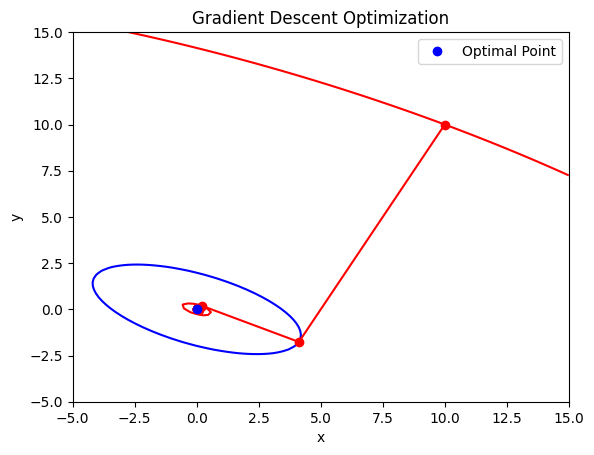

In [14]:
x_opt, f_opt, points = steepest_descent(f1, grad_f1, x0, eps, max_iter)

t = np.linspace(-5, 15, 100)
X, Y = np.meshgrid(t, t)
Z = f1([X, Y])

fig, ax = plt.subplots()
ax.contour(X, Y, Z, colors=['red', 'blue'], levels=sorted([f1(p) for p in points]))
ax.plot(points[:, 0], points[:, 1], 'ro-')
ax.plot(x_opt[0], x_opt[1], 'bo', label='Optimal Point')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Gradient Descent Optimization')
ax.legend()

plt.show()

##### Метод сопряженных градиентов #####

In [15]:
x_opt, f_opt, _ = fletcher_reeves(f1, grad_f1, x0)

print("Optimal variable values:", ["{:.15f}".format(x) for x in x_opt])
print("Function value at the optimal point:", "{:.15f}".format(f_opt))

Optimal variable values: ['0.000000739180757', '-0.000000320639096']
Function value at the optimal point: 0.000000000000381


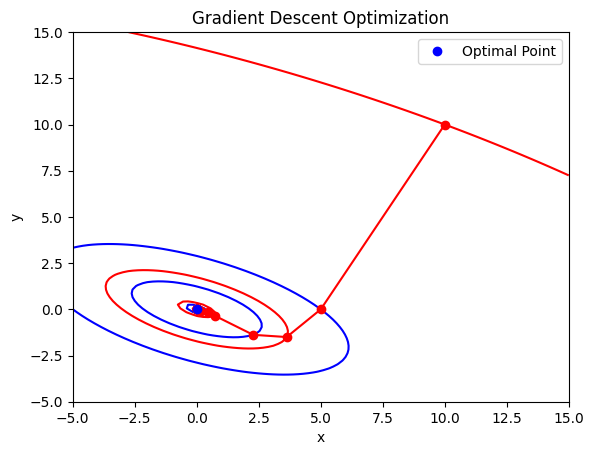

In [16]:
x_opt, f_opt, points = fletcher_reeves(f1, grad_f1, x0)

t = np.linspace(-5, 15, 100)
X, Y = np.meshgrid(t, t)
Z = f1([X, Y])

fig, ax = plt.subplots()
ax.contour(X, Y, Z, colors=['red', 'blue'], levels=sorted([f1(p) for p in points]))
ax.plot(points[:, 0], points[:, 1], 'ro-')
ax.plot(x_opt[0], x_opt[1], 'bo', label='Optimal Point')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Gradient Descent Optimization')
ax.legend()

plt.show()

******б)****** $f(x)= 10(x-5)^2 + (y-7)^2$

In [17]:
def f2(x):
    return 10 * (x[0] - 5) ** 2 + (x[1] - 7) ** 2

def grad_f2(x):
    return np.array([20 * (x[0] - 5), 2 * (x[1] - 7)])

##### Спуск с постоянным шагом #####

In [18]:
x_opt, f_opt, _ = gradient_descent_constant_step(f2, grad_f2, x0, 0.001, 10000)

print("Optimal variable values:", ["{:.15f}".format(x) for x in x_opt])
print("Function value at the optimal point:", "{:.15f}".format(f_opt))

Optimal variable values: ['5.000000000000021', '7.000000006060852']
Function value at the optimal point: 0.000000000000000


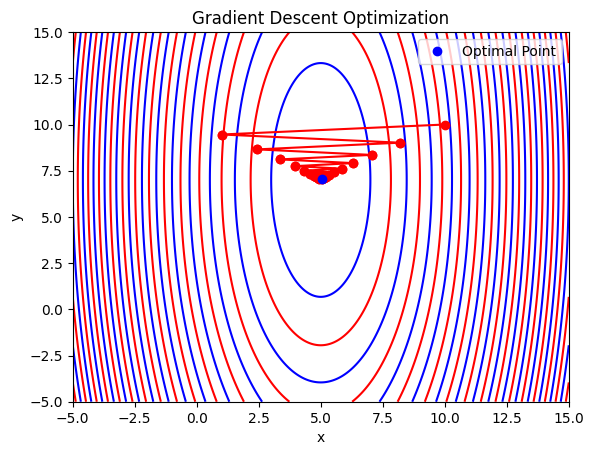

In [19]:
x_opt, f_opt, points = gradient_descent_constant_step(f2, grad_f2, x0, 0.09, 20)

t = np.linspace(-5, 15, 1000)
X, Y = np.meshgrid(t, t)
Z = f2([X, Y])

fig, ax = plt.subplots()
ax.contour(X, Y, Z, colors=['red', 'blue'], levels=30)
ax.plot(points[:, 0], points[:, 1], 'ro-')
ax.plot(x_opt[0], x_opt[1], 'bo', label='Optimal Point')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Gradient Descent Optimization')
ax.legend()

plt.show()



##### Спуск с дроблением шага #####

In [20]:
x_opt, f_opt, _ = armijo_backtracking(f2, grad_f2, x0)

print("Optimal variable values:", ["{:.15f}".format(x) for x in x_opt])
print("Function value at the optimal point:", "{:.15f}".format(f_opt))

Optimal variable values: ['5.000000000000000', '7.000000355428985']
Function value at the optimal point: 0.000000000000126


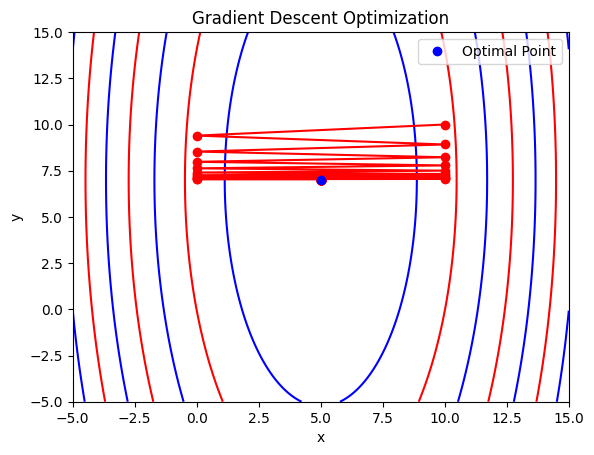

In [21]:
x_opt, f_opt, points = armijo_backtracking(f2, grad_f2, x0)

t = np.linspace(-5, 15, 1000)
X, Y = np.meshgrid(t, t)
Z = f2([X, Y])

fig, ax = plt.subplots()
ax.contour(X, Y, Z, colors=['red', 'blue'])
ax.plot(points[:, 0], points[:, 1], 'ro-')
ax.plot(x_opt[0], x_opt[1], 'bo', label='Optimal Point')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Gradient Descent Optimization')
ax.legend()

plt.show()

##### Метод наискорейшего спуска #####

In [22]:
eps = 1e-6
max_iter = 10000

x_opt, f_opt, _ = steepest_descent(f2, grad_f2, x0, eps, max_iter)

print("Optimal variable values:", ["{:.15f}".format(x) for x in x_opt])
print("Function value at the optimal point:", "{:.15f}".format(f_opt))


Optimal variable values: ['5.000000002467669', '7.000000001475072']
Function value at the optimal point: 0.000000000000000


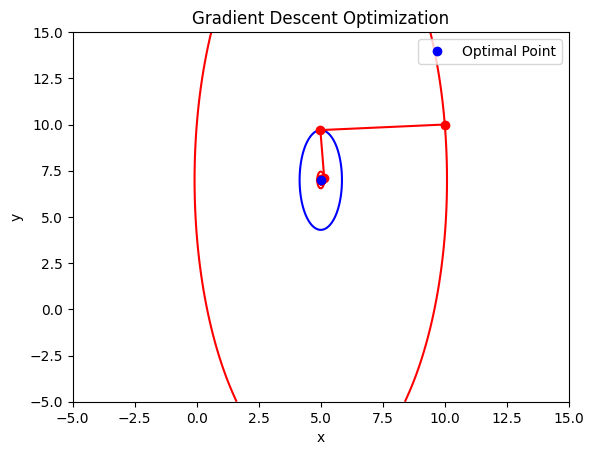

In [23]:
x_opt, f_opt, points = steepest_descent(f2, grad_f2, x0, eps, max_iter)

t = np.linspace(-5, 15, 1000)
X, Y = np.meshgrid(t, t)
Z = f2([X, Y])

fig, ax = plt.subplots()
ax.contour(X, Y, Z, colors=['red', 'blue'], levels=sorted([f2(p) for p in points]))
ax.plot(points[:, 0], points[:, 1], 'ro-')
ax.plot(x_opt[0], x_opt[1], 'bo', label='Optimal Point')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Gradient Descent Optimization')
ax.legend()

plt.show()



##### Метод сопряженных градиентов #####

In [24]:
x_opt, f_opt, _ = fletcher_reeves(f2, grad_f2, x0)

print("Optimal variable values:", ["{:.15f}".format(x) for x in x_opt])
print("Function value at the optimal point:", "{:.15f}".format(f_opt))

Optimal variable values: ['4.999999967782427', '6.999999627268957']
Function value at the optimal point: 0.000000000000149


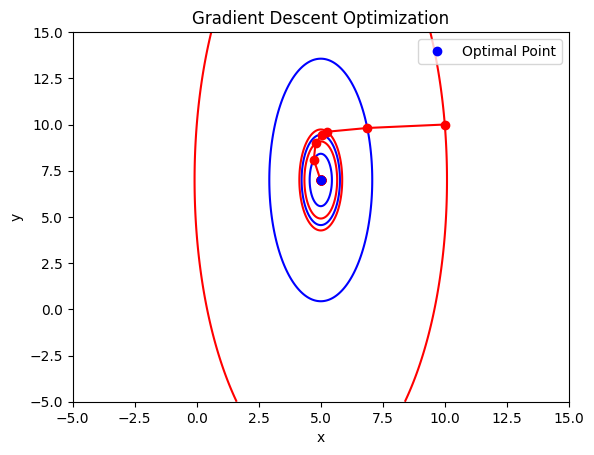

In [25]:
x_opt, f_opt, points = fletcher_reeves(f2, grad_f2, x0)

t = np.linspace(-5, 15, 1000)
X, Y = np.meshgrid(t, t)
Z = f2([X, Y])

fig, ax = plt.subplots()
ax.contour(X, Y, Z, colors=['red', 'blue'], levels=sorted([f2(p) for p in points]))
ax.plot(points[:, 0], points[:, 1], 'ro-')
ax.plot(x_opt[0], x_opt[1], 'bo', label='Optimal Point')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Gradient Descent Optimization')
ax.legend()

plt.show()

****6. Для каждой функции****

******a) Исследуйте сходимость градиентного спуска с постоянным шагом, сравните полученные результаты для выбранных функций******

In [26]:
def f(x, y):
    return 10 * (x - 5) ** 2 + (y - 7) ** 2


def grad(x, y):
    return [2 * 10 * x - 10 * 10,
            2 * y - 14]


lr = 0.09
epoch = 20
x = [-10, -10]

plt.rcParams["figure.figsize"] = (10, 10)

points = np.zeros((100, 2))
points[0] = x


def descent(x0):
    for i in range(1, epoch):
        x0 = x0 - lr * np.array(grad(x0[0], x0[1]))
        points[i] = x0

def trim_zeros(arr):
    slices = tuple(slice(idx.min(), idx.max() + 1) for idx in np.nonzero(arr))
    return arr[slices]


eps = 0.01


def show():
    global points
    descent(x)
    points = trim_zeros(points)
    print(points)
    t = np.linspace(-30, 30, 1000)
    X, Y = np.meshgrid(t, t)
    plt.plot(points[:, 0], points[:, 1], 'o-')
    plt.contour(X, Y, f(X, Y), colors=['red', 'blue'], levels=sorted([f(p[0], p[1]) for p in points]))


[[-10.         -10.        ]
 [ 17.          -6.94      ]
 [ -4.6         -4.4308    ]
 [ 12.68        -2.373256  ]
 [ -1.144       -0.68606992]
 [  9.9152       0.69742267]
 [  1.06784      1.83188659]
 [  8.145728     2.762147  ]
 [  2.4834176    3.52496054]
 [  7.01326592   4.15046764]
 [  3.38938726   4.66338347]
 [  6.28849019   5.08397444]
 [  3.96920785   5.42885904]
 [  5.82463372   5.71166442]
 [  4.34029302   5.94356482]
 [  5.52776558   6.13372315]
 [  4.57778753   6.28965299]
 [  5.33776997   6.41751545]
 [  4.72978402   6.52236267]
 [  5.21617278   6.60833739]]


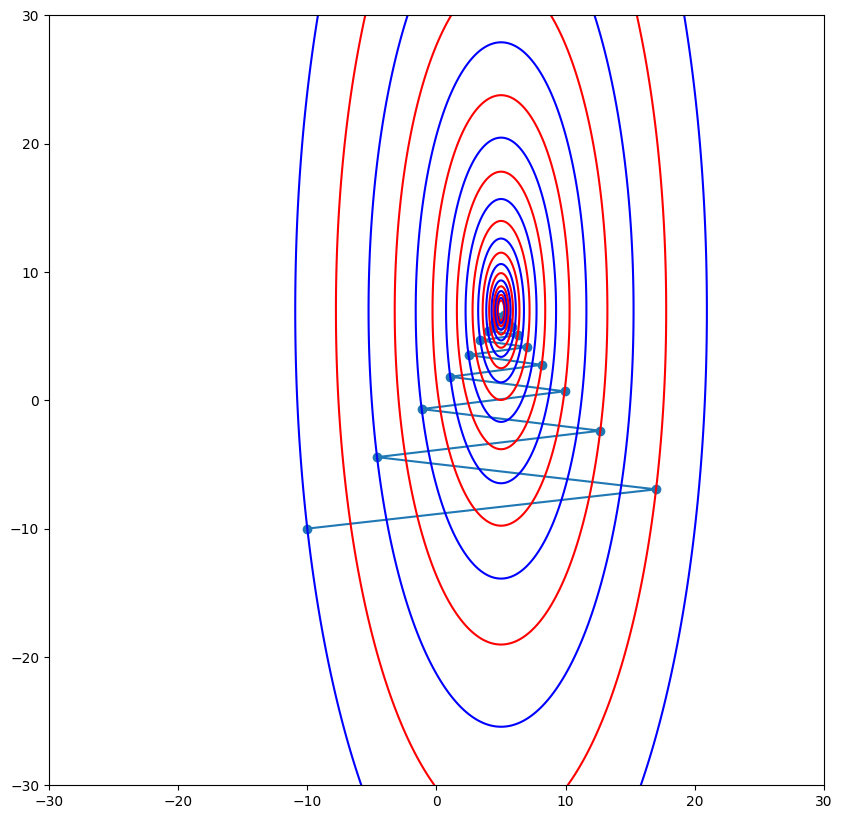

In [27]:
show()  # alpha = 10, beta = 1: изменение alpha приводит к изменению траектории градиента

# данный пример демонстрирует плохую сходимость спуска

In [28]:
def f(x, y):
    return x ** 2 + 3*y** 2 + 2*x*y


def grad(x, y):
    return [2 * x - 2 * x,
            6 * y - 2 * y]


lr = 0.09
epoch = 20
x = [-5, -5]

plt.rcParams["figure.figsize"] = (10, 10)

points = np.zeros((100, 2))
points[0] = x


def descent(x0):
    for i in range(1, epoch):
        x0 = x0 - lr * np.array(grad(x0[0], x0[1]))
        points[i] = x0

def trim_zeros(arr):
    slices = tuple(slice(idx.min(), idx.max() + 1) for idx in np.nonzero(arr))
    return arr[slices]


eps = 0.01


def show():
    global points
    descent(x)
    points = trim_zeros(points)
    print(points)
    t = np.linspace(-30, 30, 1000)
    X, Y = np.meshgrid(t, t)
    plt.plot(points[:, 0], points[:, 1], 'o-')
    plt.contour(X, Y, f(X, Y), colors=['red', 'blue'], levels=sorted([f(p[0], p[1]) for p in points]))


[[-5.00000000e+00 -5.00000000e+00]
 [-5.00000000e+00 -3.20000000e+00]
 [-5.00000000e+00 -2.04800000e+00]
 [-5.00000000e+00 -1.31072000e+00]
 [-5.00000000e+00 -8.38860800e-01]
 [-5.00000000e+00 -5.36870912e-01]
 [-5.00000000e+00 -3.43597384e-01]
 [-5.00000000e+00 -2.19902326e-01]
 [-5.00000000e+00 -1.40737488e-01]
 [-5.00000000e+00 -9.00719925e-02]
 [-5.00000000e+00 -5.76460752e-02]
 [-5.00000000e+00 -3.68934881e-02]
 [-5.00000000e+00 -2.36118324e-02]
 [-5.00000000e+00 -1.51115727e-02]
 [-5.00000000e+00 -9.67140656e-03]
 [-5.00000000e+00 -6.18970020e-03]
 [-5.00000000e+00 -3.96140813e-03]
 [-5.00000000e+00 -2.53530120e-03]
 [-5.00000000e+00 -1.62259277e-03]
 [-5.00000000e+00 -1.03845937e-03]]


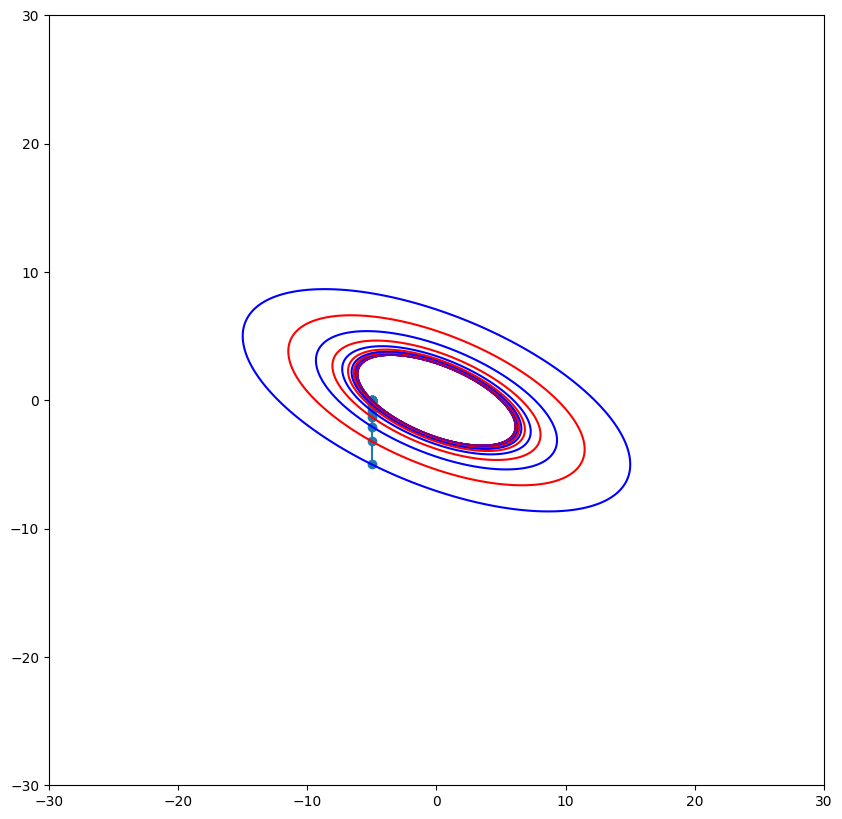

In [29]:
show()

******б) Сравните эффективность методов с точки зрения количества вычислений минимизируемой функции и её градиентов******

Constant step gradient method:
Number of function and gradient evaluations: 2998
Gradient method with Armijo condition:
Number of function and gradient evaluations: 2
Steepest descent with golden section method:
Number of function and gradient evaluations: 79
Conjugate gradient method:
Number of function and gradient evaluations: 2


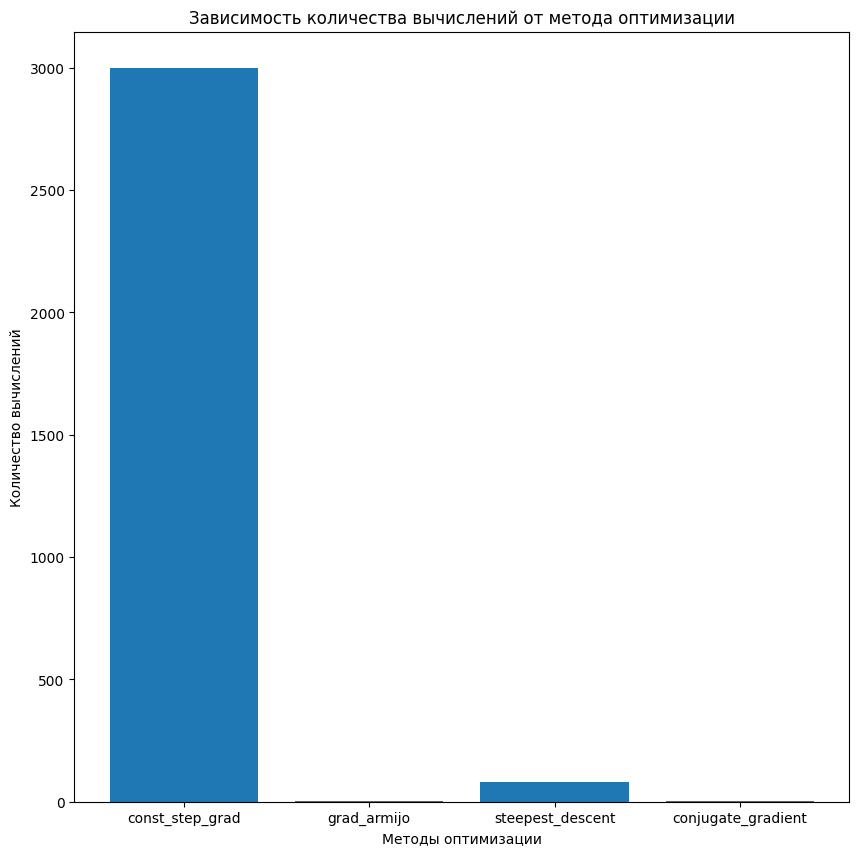

In [30]:
from scipy.optimize import minimize_scalar
def fun(x):
    return x[0]**2 + 3*x[1]**2 + 2*x[0]*x[1]

def grad_fun(x):
    grad_x = 2*x[0] + 2*x[1]
    grad_y = 6*x[1] + 2*x[0]
    return np.array([grad_x, grad_y])

def grad_const_step(x0, step_size):
    x = np.copy(x0)
    num_grad = 0
    f_val = fun(x)
    grad_val = grad_fun(x)
    while True:
        x_new = x - step_size * grad_val
        num_grad += 1
        f_new_val = fun(x_new)
        if f_new_val >= f_val:
            break
        f_val = f_new_val
        x = x_new
        grad_val = grad_fun(x)
    return x, f_val, num_grad

def grad_armijo(x0):
    c = 0.5
    rho = 0.5
    x = np.copy(x0)
    num_grad = 0
    f_val = fun(x)
    grad_val = grad_fun(x)
    step_size = 1
    while True:
        x_new = x - step_size * grad_val
        num_grad += 1
        f_new_val = fun(x_new)
        if f_new_val <= f_val + c * step_size * np.dot(grad_val, grad_val):
            break
        step_size *= rho
    f_val = f_new_val
    x = x_new
    grad_val = grad_fun(x)
    return x, f_val, num_grad

def steepest_descent(x0):
    a = 0
    b = 100
    rho = 0.382
    x = np.copy(x0)
    num_grad = 0
    f_val = fun(x)
    grad_val = grad_fun(x)
    while True:
        x1 = a + rho * (b - a)
        x2 = b - rho * (b - a)
        f1 = fun(x - x1 * grad_val)
        f2 = fun(x - x2 * grad_val)
        num_grad += 2
        if f1 < f2:
            b = x2
            f_val = f1
        else:
            a = x1
            f_val = f2
        if abs(b - a) < 1e-6:
            break
    x_new = x - 0.5 * (a + b) * grad_val
    f_val = fun(x_new)
    grad_val = grad_fun(x_new)
    num_grad += 1
    return x_new, f_val, num_grad

def conjugate_gradient(x0):
    x = np.copy(x0)
    num_grad = 0
    f_val = fun(x)
    grad_val = grad_fun(x)
    d = -grad_val
    while True:
        step_size = minimize_scalar(lambda alpha: fun(x + alpha * d)).x
        x_new = x + step_size * d
        num_grad += 1
        if np.linalg.norm(grad_fun(x_new)) < 1e-6:
            break
        beta = np.dot(grad_fun(x_new), grad_fun(x_new)) / np.dot(grad_val, grad_val)
        grad_val = grad_fun(x_new)
        d = -grad_val + beta * d
        x = x_new
        f_val = fun(x)
    return x_new, f_val, num_grad

x0 = np.array([-10, 10])

# Вызов функций для расчета оптимальных значений и количества вычислений функций и ее градиентов
res_const_step = grad_const_step(x0, 0.1)
res_armijo = grad_armijo(x0)
res_steepest_descent = steepest_descent(x0)
res_conjugate_gradient = conjugate_gradient(x0)

print("Constant step gradient method:")
print("Number of function and gradient evaluations:", res_const_step[2])

print("Gradient method with Armijo condition:")
print("Number of function and gradient evaluations:", res_armijo[2])

print("Steepest descent with golden section method:")
print("Number of function and gradient evaluations:", res_steepest_descent[2])

print("Conjugate gradient method:")
print("Number of function and gradient evaluations:", res_conjugate_gradient[2])

methods = ['const_step_grad', 'grad_armijo', 'steepest_descent', 'conjugate_gradient']
calculations = [2998, 2, 79, 2]
plt.bar(methods, calculations)
plt.title('Зависимость количества вычислений от метода оптимизации')
plt.xlabel('Методы оптимизации')
plt.ylabel('Количество вычислений')
plt.show()

Constant step gradient method:
Number of function and gradient evaluations: 77
Gradient method with Armijo condition:
Number of function and gradient evaluations: 4
Steepest descent with golden section method:
Number of function and gradient evaluations: 79
Conjugate gradient method:
Number of function and gradient evaluations: 2


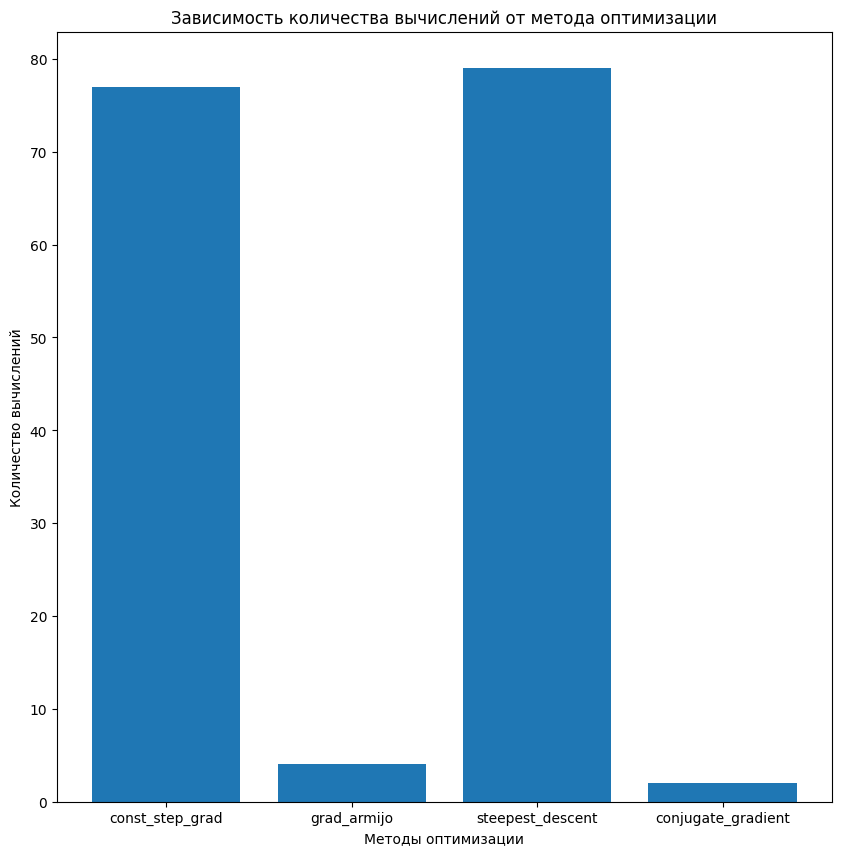

In [31]:
def fun(x):
    return 10 * (x[0] - 5) ** 2 + (x[1] - 7) ** 2

def grad_fun(x):
    return np.array([20 * (x[0] - 5), 2 * (x[1] - 7)])

x0 = np.array([-5, -5])

res_const_step = grad_const_step(x0, 0.1)
res_armijo = grad_armijo(x0)
res_steepest_descent = steepest_descent(x0)
res_conjugate_gradient = conjugate_gradient(x0)

print("Constant step gradient method:")
print("Number of function and gradient evaluations:", res_const_step[2])

print("Gradient method with Armijo condition:")
print("Number of function and gradient evaluations:", res_armijo[2])

print("Steepest descent with golden section method:")
print("Number of function and gradient evaluations:", res_steepest_descent[2])

print("Conjugate gradient method:")
print("Number of function and gradient evaluations:", res_conjugate_gradient[2])

methods = ['const_step_grad', 'grad_armijo', 'steepest_descent', 'conjugate_gradient']
calculations = [77, 4, 79, 2]
plt.bar(methods, calculations)
plt.title('Зависимость количества вычислений от метода оптимизации')
plt.xlabel('Методы оптимизации')
plt.ylabel('Количество вычислений')
plt.show()

******c) Исследуйте работу методов в зависимости от выбора начальной точки******

In [32]:
# Определение минимизируемой функции и ее градиентов
def fun(x):
    return x[0]**2 + 3*x[1]**2 + 2*x[0]*x[1]

def grad_fun(x):
    grad_x = 2*x[0] + 2*x[1]
    grad_y = 6*x[1] + 2*x[0]
    return np.array([grad_x, grad_y])

# Определение списка начальных точек
initial_points = [(-5, -5), (-7, -7), (-10, -10), (-15, 5), (-15, 10)]
# Создание пустых списков для хранения результатов
const_step_res = []
armijo_res = []
steepest_descent_res = []
conjugate_gradient_res = []

# Запуск методов оптимизации для каждой начальной точки и добавление результатов в списки
for point in initial_points:
    const_step_res.append(grad_const_step(point, 0.1))
    armijo_res.append(grad_armijo(point))
    steepest_descent_res.append(steepest_descent(point))
    conjugate_gradient_res.append(conjugate_gradient(point))


print("Constant step gradient method:")
for i in range(len(initial_points)):
    print("Point:", initial_points[i])
    print("Optimal value:", const_step_res[i][1])
    print("Number of function and gradient evaluations:", const_step_res[i][2])

print("\nGradient method with Armijo condition:")
for i in range(len(initial_points)):
    print("Point:", initial_points[i])
    print("Optimal value:", armijo_res[i][1])
    print("Number of function and gradient evaluations:", armijo_res[i][2])

print("\nSteepest method:")
for i in range(len(initial_points)):
    print("Point:", initial_points[i])
    print("Optimal value:", steepest_descent_res[i][1])
    print("Number of function and gradient evaluations:", steepest_descent_res[i][2])

print("\nConjugate gradient method:")
for i in range(len(initial_points)):
    print("Point:", initial_points[i])
    print("Optimal value:", conjugate_gradient_res[i][1])
    print("Number of function and gradient evaluations:", conjugate_gradient_res[i][2])


Constant step gradient method:
Point: (-5, -5)
Optimal value: 2e-323
Number of function and gradient evaluations: 2987
Point: (-7, -7)
Optimal value: 2e-323
Number of function and gradient evaluations: 2991
Point: (-10, -10)
Optimal value: 6e-323
Number of function and gradient evaluations: 2989
Point: (-15, 5)
Optimal value: 4e-323
Number of function and gradient evaluations: 2999
Point: (-15, 10)
Optimal value: 2e-323
Number of function and gradient evaluations: 3002

Gradient method with Armijo condition:
Point: (-5, -5)
Optimal value: 75.0
Number of function and gradient evaluations: 3
Point: (-7, -7)
Optimal value: 147.0
Number of function and gradient evaluations: 3
Point: (-10, -10)
Optimal value: 300.0
Number of function and gradient evaluations: 3
Point: (-15, 5)
Optimal value: 150
Number of function and gradient evaluations: 1
Point: (-15, 10)
Optimal value: 275.0
Number of function and gradient evaluations: 2

Steepest method:
Point: (-5, -5)
Optimal value: 2.941176470599794

In [33]:
from scipy.optimize import minimize_scalar

def fun(x):
    return 10 * (x[0] - 5) ** 2 + (x[1] - 7) ** 2

def grad_fun(x):
    return np.array([20 * (x[0] - 5), 2 * (x[1] - 7)])

# Определение списка начальных точек
initial_points = [(-5, -5), (-0, -0), (-10, -10), (-15, -4), (-15, 5)]
# Создание пустых списков для хранения результатов
const_step_res = []
armijo_res = []
steepest_descent_res = []
conjugate_gradient_res = []

# Запуск методов оптимизации для каждой начальной точки и добавление результатов в списки
for point in initial_points:
    const_step_res.append(grad_const_step(point, 0.1))
    armijo_res.append(grad_armijo(point))
    steepest_descent_res.append(steepest_descent(point))
    conjugate_gradient_res.append(conjugate_gradient(point))

# Вывод результатов
print("Constant step gradient method:")
for i in range(len(initial_points)):
    print("Point:", initial_points[i])
    print("Optimal value:", const_step_res[i][1])
    print("Number of function and gradient evaluations:", const_step_res[i][2])

print("\nGradient method with Armijo condition:")
for i in range(len(initial_points)):
    print("Point:", initial_points[i])
    print("Optimal value:", armijo_res[i][1])
    print("Number of function and gradient evaluations:", armijo_res[i][2])

print("\nSteepest method:")
for i in range(len(initial_points)):
    print("Point:", initial_points[i])
    print("Optimal value:", steepest_descent_res[i][1])
    print("Number of function and gradient evaluations:", steepest_descent_res[i][2])

print("\nConjugate gradient method:")
for i in range(len(initial_points)):
    print("Point:", initial_points[i])
    print("Optimal value:", conjugate_gradient_res[i][1])
    print("Number of function and gradient evaluations:", conjugate_gradient_res[i][2])


Constant step gradient method:
Point: (-5, -5)
Optimal value: 1000.0000000000002
Number of function and gradient evaluations: 77
Point: (0, 0)
Optimal value: 250.00000000000003
Number of function and gradient evaluations: 79
Point: (-10, -10)
Optimal value: 2250.0000000000005
Number of function and gradient evaluations: 77
Point: (-15, -4)
Optimal value: 4000.0000000000005
Number of function and gradient evaluations: 75
Point: (-15, 5)
Optimal value: 4000.0000000000005
Number of function and gradient evaluations: 67

Gradient method with Armijo condition:
Point: (-5, -5)
Optimal value: 2331.0
Number of function and gradient evaluations: 4
Point: (0, 0)
Optimal value: 590.0625
Number of function and gradient evaluations: 4
Point: (-10, -10)
Optimal value: 5225.0625
Number of function and gradient evaluations: 4
Point: (-15, -4)
Optimal value: 9068.0625
Number of function and gradient evaluations: 4
Point: (-15, 5)
Optimal value: 9002.25
Number of function and gradient evaluations: 4

St

****7. Реализуйте генератор случайных квадратичных функций n переменных с числом обусловленности k****

Число обусловленности функции по отношению к аргументу измеряет, насколько может измениться значение функции при небольшом изменении аргумента.

k - число обусловленности, вводится с консоли
n - количество переменных, вводится с консоли

Будем генерировать диагональную матрицу с положительными случайными коэффициентами от 1 до k на диагонали. Зафиксируем случайным образом один из них как k, другой как 1.
Тогда число обусловленности функции будет равняться отношению максимального и минимального диагональных элементов, то есть k = k.

Это следует напрямую из спектральной нормы матрицы. Иными словами, мы получили способ генерации матриц с заранее заданным числом обусловленности и количеством переменных n, следовательно, нам не нужно вычислять остальные нормы.

Были реализованы функции:


In [34]:
from random import random
def quadratic_function_generator(n, k):
    a = [[0] * n for _ in range(n)]
    firstInd = random.randint(0, n - 1)
    secondInd = random.randint(0, n - 1)
    if n != 1:
        while firstInd == secondInd:
            secondInd = random.randint(0, n - 1)
        a[firstInd][firstInd] = k
        a[secondInd][secondInd] = 1
    else:
        a[firstInd][firstInd] = k

    for i in range(n):
        if i == firstInd or i == secondInd:
            continue
        a[i][i] = random.randint(1, k)
    return a

Возвращает матрицу квадратичной функции, где
n - количество переменных,
k - число обусловленности

In [35]:
def get_function(a):
    f = []
    for i in range(len(a)):
        f.append(a[i][i])
    return f

Возвращает вектор переменных, где matrix - матрица квадратичной функции.

In [36]:
def display_function(f):
    print(f[0], '*x_0', '^2', sep='', end='')
    for i in range(1, len(f)):
        print(' + ', f[i], "*x_", i, '^2', sep='', end='')

Выводит функцию в читаемом виде, где f - это вектор переменных.

In [37]:
def get_gradient(f):
    gr = []
    for i in f:
        gr.append(2 * i)
    return gr

Возвращает градиент функции, где f - вектор переменных.

****8-9****

В этом задании требуется рассмотреть зависимость количества итераций градиентного спуска от размерности пространства n и числа обусловленности функции k. Для этого воспользуемся генератором функций из предыдущего задания. Для каждого значения n и k в диапазоне от 0 до 1000 запустим градиентный спуск на соответствующей функции и выведем данные в виде графика.

![myplot.png](data:image/png)

Вывод:
Исходя из полученных данных, можно сделать вывод, что количество итераций зависит от числа обусловленности (причем, судя по графику, зависимость имеет около линейный характер) и практически не зависит от размерности пространства.
